# UMAP as a step in preprocessing

This is an example how UMAP helps certain estimators, Here we follow these [notes](https://umap-learn.readthedocs.io/en/latest/transform.html).

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})

Let's use the digits dataset to evaluate the performance of the default SVC classifier.

In [10]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

We train a kNN classifier as a baseline.

In [13]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

svc.score(X_test, y_test), knn.score(X_test, y_test)

(0.9911111111111112, 0.9844444444444445)

Hmmm... svc has a fantastic score. In the notes we are following here, the svc has very poor performance on the unprocessed data. Let's assumed that happened here too...

## Let's use UMAP

In [15]:
import umap

We reduce to 2 dimensions:

In [16]:
trans = umap.UMAP(n_neighbors=5, n_components=2, random_state=42).fit(X_train)

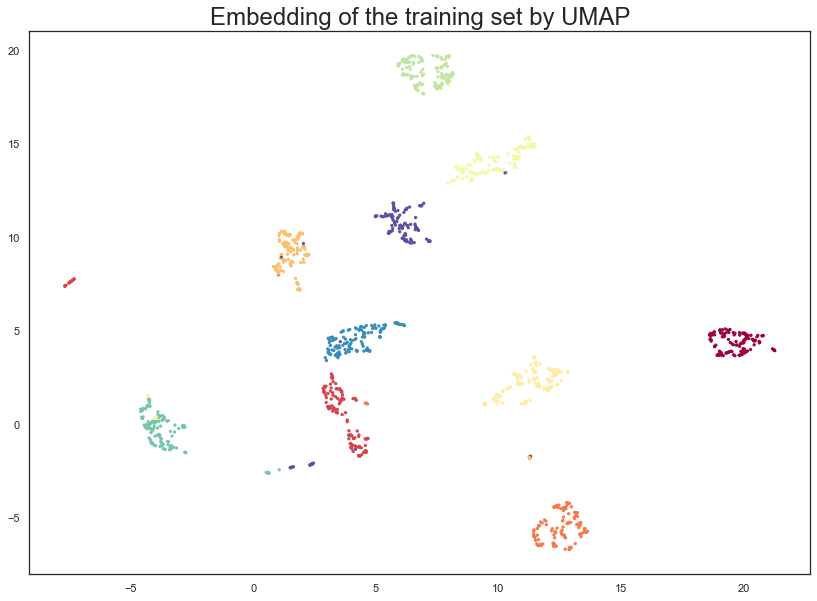

In [17]:
plt.scatter(trans.embedding_[:,0], trans.embedding_[:,1], s=5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

Train using the transformed data:

In [7]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

We plot the transformed test data:

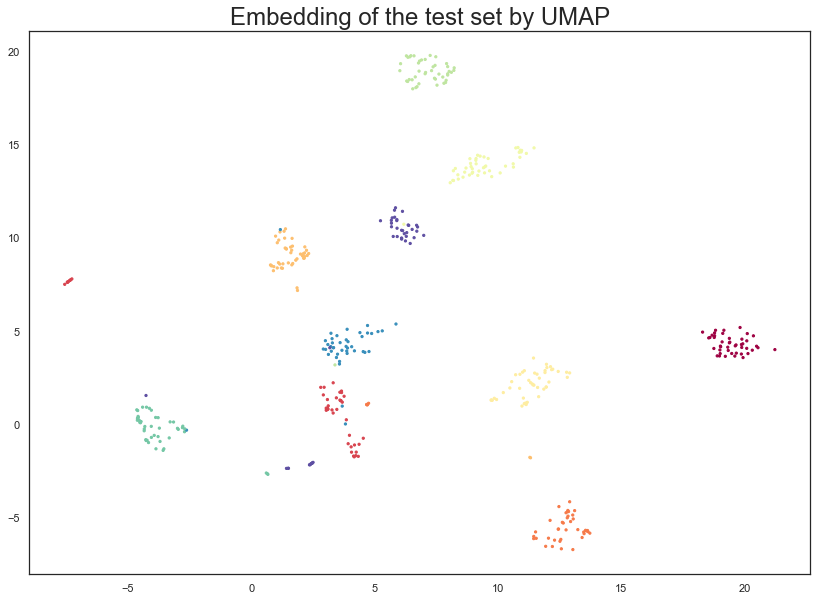

In [8]:
test_embedding = trans.transform(X_test)
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

In [9]:
svc.score(test_embedding, y_test), knn.score(test_embedding, y_test)

(0.9622222222222222, 0.9822222222222222)

Here we see that the UMAP is not helpful, but we see how it could be.